# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
                                    'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
                                    'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75'])

# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,r_MIN,r_MAX,r_MEAN,...,g_Q25,g_Q50,g_Q75,b_MIN,b_MAX,b_MEAN,b_STD,b_Q25,b_Q50,b_Q75
0,6.824,9.240,1912,784,-0.73,2.58,2.33,13,247,117.308148,...,95,136,172,10,232,92.565868,35.145074,63,92,120
1,8.189,9.622,2005,818,0.59,2.92,2.47,24,234,116.193248,...,89,136,177,15,191,96.102318,36.135511,66,97,126
2,8.380,9.589,2001,818,0.78,2.88,2.44,18,222,118.713846,...,96,138,178,12,187,97.222011,35.938764,68,97,127
3,8.137,9.449,2040,833,0.52,2.72,2.55,15,222,114.468779,...,89,133,176,10,199,96.135305,35.908361,67,96,127
4,7.696,9.401,1758,717,0.22,2.83,2.14,8,227,116.849925,...,88,132,176,13,207,100.635043,38.062522,69,99,132


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   r_MIN          103 non-null    int64  
 8   r_MAX          103 non-null    int64  
 9   r_MEAN         103 non-null    float64
 10  r_STD          103 non-null    float64
 11  r_Q25          103 non-null    int64  
 12  r_Q50          103 non-null    int64  
 13  r_Q75          103 non-null    int64  
 14  g_MIN          103 non-null    int64  
 15  g_MAX          103 non-null    int64  
 16  g_MEAN         103 non-null    float64
 17  g_STD          103 non-null    float64
 18  g_Q25     

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_19498/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,r_MIN,r_MAX,r_MEAN,...,g_Q25,g_Q50,g_Q75,b_MIN,b_MAX,b_MEAN,b_STD,b_Q25,b_Q50,b_Q75
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,11.378641,230.640777,110.887259,...,90.864078,132.155340,168.893204,12.621359,214.495146,97.487968,35.164575,68.747573,97.718447,125.669903
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,9.139568,14.898911,13.142533,...,16.629202,14.583604,13.249427,8.475011,21.437951,10.980674,5.338700,13.415471,12.490324,12.033767
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,2.000000,186.000000,76.511395,...,53.000000,95.000000,129.000000,2.000000,152.000000,71.905752,20.570709,42.000000,69.000000,94.000000
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,5.000000,220.000000,101.210585,...,80.000000,123.000000,160.500000,7.000000,199.000000,90.400818,31.746440,58.500000,89.500000,119.000000
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,8.000000,233.000000,109.991054,...,90.000000,135.000000,170.000000,10.000000,212.000000,96.440293,36.135511,67.000000,98.000000,127.000000
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,15.000000,244.000000,120.317332,...,103.000000,141.000000,178.000000,17.000000,234.500000,104.549168,39.139044,78.500000,107.000000,134.000000
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,56.000000,251.000000,143.611361,...,134.000000,170.000000,196.000000,51.000000,251.000000,124.176596,45.825416,103.000000,129.000000,151.000000


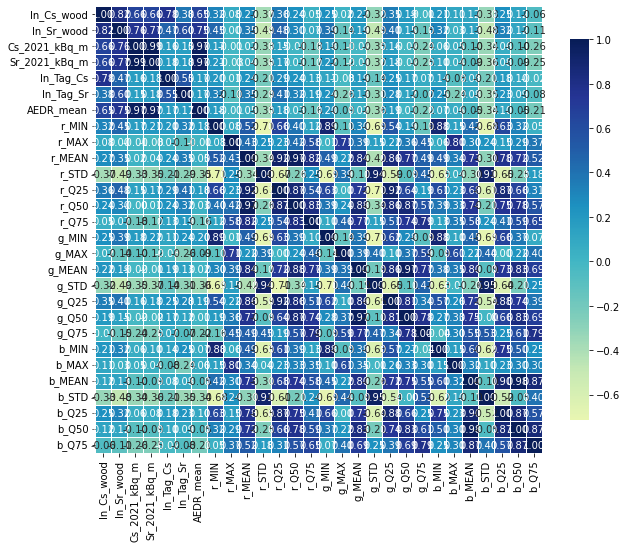

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
                                   'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
                                   'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75'])
y = pd.DataFrame(select, columns= ['ln_Tag_Sr'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [10]:
# Columns in "X" data collections
X.head()

,r_MIN,r_MAX,r_MEAN,r_STD,r_Q25,r_Q50,r_Q75,g_MIN,g_MAX,g_MEAN,...,b_MEAN,b_STD,b_Q25,b_Q50,b_Q75,Random1,Random2,Random3,Random4,Random5
0,13,247,117.308148,44.595278,80,120,153,18,243,133.748091,...,92.565868,35.145074,63,92,120,10.652100,9.760279,11.605533,12.622386,8.991536
1,24,234,116.193248,43.749380,79,120,153,21,248,132.240460,...,96.102318,36.135511,66,97,126,12.335353,10.057367,10.131033,8.524995,7.184852
2,18,222,118.713846,42.450775,84,121,155,20,240,135.985871,...,97.222011,35.938764,68,97,127,8.834361,9.923034,7.316829,6.453074,12.036080
3,15,222,114.468779,42.851746,78,116,152,15,244,131.566750,...,96.135305,35.908361,67,96,127,11.301067,8.836837,11.915757,12.181265,13.253696
4,8,227,116.849925,44.170268,80,119,155,12,243,131.173455,...,100.635043,38.062522,69,99,132,9.896342,8.816197,6.682405,9.457975,8.345189


In [11]:
# Columns in "y" data collections
y.head()

,ln_Tag_Sr
0,2.58
1,2.92
2,2.88
3,2.72
4,2.83


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.26349515390186906, -0.14658357649663611, 0.1006491571161583]
    Mean: 0.073
    Std: 0.169

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.7254691  0.87488332 0.74958332]
    Mean: 0.783
    Std: 0.065

 --------------------
Mean absolute error (MAE): 

    Scores: [0.7074747119631086, 0.5823787320361418, 0.5430736782971549]
    Mean: 0.611
    Std: 0.070

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=30, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model with rank: 1
Mean validation score: 0.106 (std: 0.274)
Parameters: {'colsample_bytree': 0.6803200020803802, 'gamma': 0.4181313951124618, 'learning_rate': 0.03309520722572203, 'max_depth': 2, 'n_estimators': 135, 'subsample': 0.355884922217761}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.32535181, 0.55603371, 0.68396091, 0.5921699 , 0.45306454,
       0.485639  , 0.32577124, 0.53013911, 0.16946945, 0.290975  ,
       0.49063768, 0.54523234, 0.21540513, 0.34627752, 0.25909343,
       0.20720057, 0.34850316, 0.34863296, 0.26477337, 0.47684307,
       0.16420603, 0.32878633, 0.39997349, 0.29697061, 0.40390134,
       0.2174902 , 0.50355411, 0.4207901 , 1.31218987, 0.68420005]), 'std_fit_time': array([0.09009895, 0.10506896, 0.11762861, 0.11264993, 0.08713038,
       0.03239214, 0.01211337, 0.14277147, 0.007493  , 0.00302554,
       0.0277825 , 0.04538525, 0.0069953 , 0.0058083 , 0.00390738,
       0.00857047, 0.02768235, 0.00805231, 0.009257  , 0.00787733,
       0.00314908, 0.00355183, 0.02502543, 0.00460186, 0.0184623 ,
       0.0058266 , 0.00539699, 0.12934291, 1.80542039, 0.17679557]), 'mean_score_time': array([0.00659418, 0.00661573, 0.00859866, 0.00758014, 0.00649757,
       0.00657754, 0.00642543, 0.00650353, 0.00650926, 0.00653276,
     

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6803200020803802
Gamma: 0.4181313951124618
Learning_rate: 0.03309520722572203
Max_depth: 2
N_estimators: 135
Subsample: 0.355884922217761


# Estimation of a basic XGBoost model using Loops

In [21]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [22]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:2.07176	validation_1-rmse:2.24655
[1]	validation_0-rmse:2.01086	validation_1-rmse:2.18748
[2]	validation_0-rmse:1.95966	validation_1-rmse:2.13315
[3]	validation_0-rmse:1.91218	validation_1-rmse:2.09069


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.87116	validation_1-rmse:2.03962
[5]	validation_0-rmse:1.81867	validation_1-rmse:1.98403
[6]	validation_0-rmse:1.76945	validation_1-rmse:1.93112
[7]	validation_0-rmse:1.72558	validation_1-rmse:1.88222
[8]	validation_0-rmse:1.67879	validation_1-rmse:1.83461
[9]	validation_0-rmse:1.63186	validation_1-rmse:1.78672
[10]	validation_0-rmse:1.58664	validation_1-rmse:1.74146
[11]	validation_0-rmse:1.54757	validation_1-rmse:1.69867
[12]	validation_0-rmse:1.50949	validation_1-rmse:1.65949
[13]	validation_0-rmse:1.47233	validation_1-rmse:1.61871
[14]	validation_0-rmse:1.43505	validation_1-rmse:1.58256
[15]	validation_0-rmse:1.39707	validation_1-rmse:1.55158
[16]	validation_0-rmse:1.36315	validation_1-rmse:1.51818
[17]	validation_0-rmse:1.32881	validation_1-rmse:1.48686
[18]	validation_0-rmse:1.30140	validation_1-rmse:1.45575
[19]	validation_0-rmse:1.26942	validation_1-rmse:1.42539
[20]	validation_0-rmse:1.24163	validation_1-rmse:1.39542
[21]	validation_0-rmse:1.21865	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.73589	validation_1-rmse:2.00355
[7]	validation_0-rmse:1.69928	validation_1-rmse:1.96632
[8]	validation_0-rmse:1.65628	validation_1-rmse:1.91902
[9]	validation_0-rmse:1.60906	validation_1-rmse:1.87536
[10]	validation_0-rmse:1.57266	validation_1-rmse:1.83459
[11]	validation_0-rmse:1.52734	validation_1-rmse:1.78670
[12]	validation_0-rmse:1.48761	validation_1-rmse:1.75120
[13]	validation_0-rmse:1.45411	validation_1-rmse:1.71247
[14]	validation_0-rmse:1.42116	validation_1-rmse:1.67466
[15]	validation_0-rmse:1.39243	validation_1-rmse:1.64426
[16]	validation_0-rmse:1.35961	validation_1-rmse:1.61358
[17]	validation_0-rmse:1.32523	validation_1-rmse:1.58148
[18]	validation_0-rmse:1.29501	validation_1-rmse:1.54932
[19]	validation_0-rmse:1.26331	validation_1-rmse:1.51364
[20]	validation_0-rmse:1.23299	validation_1-rmse:1.49072
[21]	validation_0-rmse:1.21563	validation_1-rmse:1.47349
[22]	validation_0-rmse:1.18522	validation_1-rmse:1.45408
[23]	validation_0-rmse:1.16740	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.90226	validation_1-rmse:1.86346
[5]	validation_0-rmse:1.85725	validation_1-rmse:1.81663
[6]	validation_0-rmse:1.80979	validation_1-rmse:1.77213
[7]	validation_0-rmse:1.77160	validation_1-rmse:1.73627
[8]	validation_0-rmse:1.73529	validation_1-rmse:1.69818
[9]	validation_0-rmse:1.68865	validation_1-rmse:1.64711
[10]	validation_0-rmse:1.64060	validation_1-rmse:1.61159
[11]	validation_0-rmse:1.60246	validation_1-rmse:1.57508
[12]	validation_0-rmse:1.56331	validation_1-rmse:1.53744
[13]	validation_0-rmse:1.52669	validation_1-rmse:1.50965
[14]	validation_0-rmse:1.49117	validation_1-rmse:1.48712
[15]	validation_0-rmse:1.44878	validation_1-rmse:1.44951
[16]	validation_0-rmse:1.41784	validation_1-rmse:1.41571
[17]	validation_0-rmse:1.38391	validation_1-rmse:1.38355
[18]	validation_0-rmse:1.36053	validation_1-rmse:1.36021
[19]	validation_0-rmse:1.32832	validation_1-rmse:1.32484
[20]	validation_0-rmse:1.30033	validation_1-rmse:1.29440
[21]	validation_0-rmse:1.27221	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.26056	validation_1-rmse:1.60382
[20]	validation_0-rmse:1.23475	validation_1-rmse:1.58200
[21]	validation_0-rmse:1.20004	validation_1-rmse:1.54335
[22]	validation_0-rmse:1.17863	validation_1-rmse:1.52870
[23]	validation_0-rmse:1.14790	validation_1-rmse:1.49564
[24]	validation_0-rmse:1.12315	validation_1-rmse:1.46547
[25]	validation_0-rmse:1.10031	validation_1-rmse:1.44327
[26]	validation_0-rmse:1.07921	validation_1-rmse:1.42428
[27]	validation_0-rmse:1.05676	validation_1-rmse:1.40251
[28]	validation_0-rmse:1.03471	validation_1-rmse:1.37944
[29]	validation_0-rmse:1.01134	validation_1-rmse:1.36302
[30]	validation_0-rmse:0.99373	validation_1-rmse:1.33859
[31]	validation_0-rmse:0.97761	validation_1-rmse:1.32347
[32]	validation_0-rmse:0.95712	validation_1-rmse:1.30036
[33]	validation_0-rmse:0.94233	validation_1-rmse:1.29076
[34]	validation_0-rmse:0.92601	validation_1-rmse:1.27300
[35]	validation_0-rmse:0.90591	validation_1-rmse:1.25637
[36]	validation_0-rmse:0.89889	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.57749	validation_1-rmse:1.53042
[12]	validation_0-rmse:1.53921	validation_1-rmse:1.49168
[13]	validation_0-rmse:1.50364	validation_1-rmse:1.46517
[14]	validation_0-rmse:1.46708	validation_1-rmse:1.43840
[15]	validation_0-rmse:1.43572	validation_1-rmse:1.41778
[16]	validation_0-rmse:1.40507	validation_1-rmse:1.39213
[17]	validation_0-rmse:1.37044	validation_1-rmse:1.36682
[18]	validation_0-rmse:1.33987	validation_1-rmse:1.33786
[19]	validation_0-rmse:1.30977	validation_1-rmse:1.32027
[20]	validation_0-rmse:1.28067	validation_1-rmse:1.29048
[21]	validation_0-rmse:1.25137	validation_1-rmse:1.26796
[22]	validation_0-rmse:1.22166	validation_1-rmse:1.23845
[23]	validation_0-rmse:1.19002	validation_1-rmse:1.20776
[24]	validation_0-rmse:1.16159	validation_1-rmse:1.19100
[25]	validation_0-rmse:1.13047	validation_1-rmse:1.16349
[26]	validation_0-rmse:1.10794	validation_1-rmse:1.14441
[27]	validation_0-rmse:1.08648	validation_1-rmse:1.12916
[28]	validation_0-rmse:1.06686	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.43093	validation_1-rmse:1.45838
[16]	validation_0-rmse:1.39861	validation_1-rmse:1.42592
[17]	validation_0-rmse:1.36472	validation_1-rmse:1.39210
[18]	validation_0-rmse:1.33354	validation_1-rmse:1.35321
[19]	validation_0-rmse:1.30581	validation_1-rmse:1.32189
[20]	validation_0-rmse:1.27750	validation_1-rmse:1.29394
[21]	validation_0-rmse:1.24539	validation_1-rmse:1.25768
[22]	validation_0-rmse:1.22382	validation_1-rmse:1.23506
[23]	validation_0-rmse:1.19573	validation_1-rmse:1.20294
[24]	validation_0-rmse:1.17288	validation_1-rmse:1.18167
[25]	validation_0-rmse:1.15121	validation_1-rmse:1.16325
[26]	validation_0-rmse:1.12637	validation_1-rmse:1.14098
[27]	validation_0-rmse:1.09855	validation_1-rmse:1.11426
[28]	validation_0-rmse:1.07475	validation_1-rmse:1.08726
[29]	validation_0-rmse:1.05893	validation_1-rmse:1.07203
[30]	validation_0-rmse:1.03826	validation_1-rmse:1.05305
[31]	validation_0-rmse:1.01564	validation_1-rmse:1.02883
[32]	validation_0-rmse:0.99976	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.28876	validation_1-rmse:1.18175
[21]	validation_0-rmse:1.25986	validation_1-rmse:1.15712
[22]	validation_0-rmse:1.22766	validation_1-rmse:1.13562
[23]	validation_0-rmse:1.20281	validation_1-rmse:1.11479
[24]	validation_0-rmse:1.17852	validation_1-rmse:1.09163
[25]	validation_0-rmse:1.15247	validation_1-rmse:1.07178
[26]	validation_0-rmse:1.12925	validation_1-rmse:1.05393
[27]	validation_0-rmse:1.10622	validation_1-rmse:1.03210
[28]	validation_0-rmse:1.08369	validation_1-rmse:1.01484
[29]	validation_0-rmse:1.05846	validation_1-rmse:1.00021
[30]	validation_0-rmse:1.04100	validation_1-rmse:0.98923
[31]	validation_0-rmse:1.01861	validation_1-rmse:0.96987
[32]	validation_0-rmse:1.00287	validation_1-rmse:0.95847
[33]	validation_0-rmse:0.98486	validation_1-rmse:0.94515
[34]	validation_0-rmse:0.96916	validation_1-rmse:0.93263
[35]	validation_0-rmse:0.95139	validation_1-rmse:0.91790
[36]	validation_0-rmse:0.93375	validation_1-rmse:0.90585
[37]	validation_0-rmse:0.92020	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.25147	validation_1-rmse:1.35963
[21]	validation_0-rmse:1.22814	validation_1-rmse:1.34033
[22]	validation_0-rmse:1.19707	validation_1-rmse:1.31976
[23]	validation_0-rmse:1.16563	validation_1-rmse:1.29421
[24]	validation_0-rmse:1.13458	validation_1-rmse:1.27183
[25]	validation_0-rmse:1.11196	validation_1-rmse:1.25120
[26]	validation_0-rmse:1.08855	validation_1-rmse:1.23129
[27]	validation_0-rmse:1.06146	validation_1-rmse:1.21299
[28]	validation_0-rmse:1.03820	validation_1-rmse:1.19617
[29]	validation_0-rmse:1.01546	validation_1-rmse:1.18546
[30]	validation_0-rmse:0.99321	validation_1-rmse:1.17131
[31]	validation_0-rmse:0.97468	validation_1-rmse:1.15848
[32]	validation_0-rmse:0.95304	validation_1-rmse:1.14457
[33]	validation_0-rmse:0.93936	validation_1-rmse:1.12863
[34]	validation_0-rmse:0.91604	validation_1-rmse:1.11381
[35]	validation_0-rmse:0.89694	validation_1-rmse:1.09784
[36]	validation_0-rmse:0.87946	validation_1-rmse:1.08277
[37]	validation_0-rmse:0.86807	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.30155	validation_1-rmse:1.26454
[20]	validation_0-rmse:1.26989	validation_1-rmse:1.24662
[21]	validation_0-rmse:1.23832	validation_1-rmse:1.22119
[22]	validation_0-rmse:1.20960	validation_1-rmse:1.19424
[23]	validation_0-rmse:1.18623	validation_1-rmse:1.17577
[24]	validation_0-rmse:1.16382	validation_1-rmse:1.15819
[25]	validation_0-rmse:1.13706	validation_1-rmse:1.13556
[26]	validation_0-rmse:1.11824	validation_1-rmse:1.11500
[27]	validation_0-rmse:1.09310	validation_1-rmse:1.09232
[28]	validation_0-rmse:1.06608	validation_1-rmse:1.07885
[29]	validation_0-rmse:1.04110	validation_1-rmse:1.05963
[30]	validation_0-rmse:1.02338	validation_1-rmse:1.04846
[31]	validation_0-rmse:1.00579	validation_1-rmse:1.03500
[32]	validation_0-rmse:0.98566	validation_1-rmse:1.02498
[33]	validation_0-rmse:0.96585	validation_1-rmse:1.00749
[34]	validation_0-rmse:0.94958	validation_1-rmse:0.99312
[35]	validation_0-rmse:0.93320	validation_1-rmse:0.97949
[36]	validation_0-rmse:0.91650	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.25624	validation_1-rmse:1.20167
[21]	validation_0-rmse:1.23017	validation_1-rmse:1.17411
[22]	validation_0-rmse:1.20552	validation_1-rmse:1.14641
[23]	validation_0-rmse:1.18086	validation_1-rmse:1.12368
[24]	validation_0-rmse:1.15532	validation_1-rmse:1.08994
[25]	validation_0-rmse:1.12712	validation_1-rmse:1.05961
[26]	validation_0-rmse:1.09969	validation_1-rmse:1.03762
[27]	validation_0-rmse:1.07956	validation_1-rmse:1.01624
[28]	validation_0-rmse:1.05352	validation_1-rmse:0.98591
[29]	validation_0-rmse:1.03746	validation_1-rmse:0.97758
[30]	validation_0-rmse:1.01487	validation_1-rmse:0.95441
[31]	validation_0-rmse:0.99550	validation_1-rmse:0.93997
[32]	validation_0-rmse:0.97435	validation_1-rmse:0.92534
[33]	validation_0-rmse:0.95639	validation_1-rmse:0.90992
[34]	validation_0-rmse:0.93493	validation_1-rmse:0.89306
[35]	validation_0-rmse:0.91460	validation_1-rmse:0.87955
[36]	validation_0-rmse:0.90143	validation_1-rmse:0.86846
[37]	validation_0-rmse:0.88773	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.34055	validation_1-rmse:1.21575
[19]	validation_0-rmse:1.30982	validation_1-rmse:1.18361
[20]	validation_0-rmse:1.27805	validation_1-rmse:1.16073
[21]	validation_0-rmse:1.25791	validation_1-rmse:1.14469
[22]	validation_0-rmse:1.22843	validation_1-rmse:1.12307
[23]	validation_0-rmse:1.19831	validation_1-rmse:1.08899
[24]	validation_0-rmse:1.17630	validation_1-rmse:1.06970
[25]	validation_0-rmse:1.15786	validation_1-rmse:1.04979
[26]	validation_0-rmse:1.13285	validation_1-rmse:1.02751
[27]	validation_0-rmse:1.10380	validation_1-rmse:0.99514
[28]	validation_0-rmse:1.08257	validation_1-rmse:0.97941
[29]	validation_0-rmse:1.06111	validation_1-rmse:0.96288
[30]	validation_0-rmse:1.04261	validation_1-rmse:0.94131
[31]	validation_0-rmse:1.01835	validation_1-rmse:0.92514
[32]	validation_0-rmse:1.00495	validation_1-rmse:0.91641
[33]	validation_0-rmse:0.98551	validation_1-rmse:0.89794
[34]	validation_0-rmse:0.96444	validation_1-rmse:0.88188
[35]	validation_0-rmse:0.94468	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.39003	validation_1-rmse:1.14015
[18]	validation_0-rmse:1.35315	validation_1-rmse:1.11349
[19]	validation_0-rmse:1.32189	validation_1-rmse:1.09246
[20]	validation_0-rmse:1.29478	validation_1-rmse:1.07511
[21]	validation_0-rmse:1.27160	validation_1-rmse:1.05584
[22]	validation_0-rmse:1.24519	validation_1-rmse:1.04107
[23]	validation_0-rmse:1.21193	validation_1-rmse:1.02008
[24]	validation_0-rmse:1.18870	validation_1-rmse:1.00616
[25]	validation_0-rmse:1.16901	validation_1-rmse:0.99642
[26]	validation_0-rmse:1.14501	validation_1-rmse:0.97424
[27]	validation_0-rmse:1.11929	validation_1-rmse:0.95597
[28]	validation_0-rmse:1.09127	validation_1-rmse:0.93653
[29]	validation_0-rmse:1.06684	validation_1-rmse:0.91685
[30]	validation_0-rmse:1.04372	validation_1-rmse:0.90574
[31]	validation_0-rmse:1.02533	validation_1-rmse:0.89656
[32]	validation_0-rmse:0.99820	validation_1-rmse:0.88660
[33]	validation_0-rmse:0.98012	validation_1-rmse:0.88097
[34]	validation_0-rmse:0.96184	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.36997	validation_1-rmse:1.18056
[19]	validation_0-rmse:1.33338	validation_1-rmse:1.15588
[20]	validation_0-rmse:1.29857	validation_1-rmse:1.12879
[21]	validation_0-rmse:1.27208	validation_1-rmse:1.11553
[22]	validation_0-rmse:1.24167	validation_1-rmse:1.09677
[23]	validation_0-rmse:1.21251	validation_1-rmse:1.07527
[24]	validation_0-rmse:1.18616	validation_1-rmse:1.05998
[25]	validation_0-rmse:1.15592	validation_1-rmse:1.03828
[26]	validation_0-rmse:1.12743	validation_1-rmse:1.01475
[27]	validation_0-rmse:1.10343	validation_1-rmse:0.99375
[28]	validation_0-rmse:1.07911	validation_1-rmse:0.97625
[29]	validation_0-rmse:1.05481	validation_1-rmse:0.95924
[30]	validation_0-rmse:1.03076	validation_1-rmse:0.94290
[31]	validation_0-rmse:1.00995	validation_1-rmse:0.92728
[32]	validation_0-rmse:0.98758	validation_1-rmse:0.91264
[33]	validation_0-rmse:0.96992	validation_1-rmse:0.90004
[34]	validation_0-rmse:0.95427	validation_1-rmse:0.89805
[35]	validation_0-rmse:0.93656	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.38136	validation_1-rmse:1.39627
[18]	validation_0-rmse:1.35229	validation_1-rmse:1.36654
[19]	validation_0-rmse:1.32512	validation_1-rmse:1.34002
[20]	validation_0-rmse:1.29168	validation_1-rmse:1.30494
[21]	validation_0-rmse:1.26227	validation_1-rmse:1.28141
[22]	validation_0-rmse:1.23385	validation_1-rmse:1.25641
[23]	validation_0-rmse:1.20876	validation_1-rmse:1.23901
[24]	validation_0-rmse:1.17646	validation_1-rmse:1.21448
[25]	validation_0-rmse:1.14969	validation_1-rmse:1.19393
[26]	validation_0-rmse:1.12965	validation_1-rmse:1.18043
[27]	validation_0-rmse:1.10976	validation_1-rmse:1.15962
[28]	validation_0-rmse:1.08133	validation_1-rmse:1.14132
[29]	validation_0-rmse:1.06111	validation_1-rmse:1.12393
[30]	validation_0-rmse:1.03686	validation_1-rmse:1.10537
[31]	validation_0-rmse:1.01923	validation_1-rmse:1.08526
[32]	validation_0-rmse:0.99559	validation_1-rmse:1.05990
[33]	validation_0-rmse:0.97357	validation_1-rmse:1.04166
[34]	validation_0-rmse:0.95930	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.33775	validation_1-rmse:1.40486
[19]	validation_0-rmse:1.30816	validation_1-rmse:1.38569
[20]	validation_0-rmse:1.27866	validation_1-rmse:1.36488
[21]	validation_0-rmse:1.24836	validation_1-rmse:1.33458
[22]	validation_0-rmse:1.21978	validation_1-rmse:1.30848
[23]	validation_0-rmse:1.19234	validation_1-rmse:1.28059
[24]	validation_0-rmse:1.17094	validation_1-rmse:1.26103
[25]	validation_0-rmse:1.14480	validation_1-rmse:1.23383
[26]	validation_0-rmse:1.11890	validation_1-rmse:1.21533
[27]	validation_0-rmse:1.09394	validation_1-rmse:1.18774
[28]	validation_0-rmse:1.07004	validation_1-rmse:1.17280
[29]	validation_0-rmse:1.04916	validation_1-rmse:1.15746
[30]	validation_0-rmse:1.03099	validation_1-rmse:1.14061
[31]	validation_0-rmse:1.01227	validation_1-rmse:1.12669
[32]	validation_0-rmse:0.98903	validation_1-rmse:1.10591
[33]	validation_0-rmse:0.96558	validation_1-rmse:1.08849
[34]	validation_0-rmse:0.95083	validation_1-rmse:1.07825
[35]	validation_0-rmse:0.93417	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.33490	validation_1-rmse:1.21869
[20]	validation_0-rmse:1.30347	validation_1-rmse:1.19191
[21]	validation_0-rmse:1.27314	validation_1-rmse:1.15883
[22]	validation_0-rmse:1.24404	validation_1-rmse:1.13593
[23]	validation_0-rmse:1.22375	validation_1-rmse:1.11796
[24]	validation_0-rmse:1.20150	validation_1-rmse:1.09635
[25]	validation_0-rmse:1.17342	validation_1-rmse:1.07398
[26]	validation_0-rmse:1.14969	validation_1-rmse:1.05706
[27]	validation_0-rmse:1.12373	validation_1-rmse:1.03417
[28]	validation_0-rmse:1.10031	validation_1-rmse:1.01900
[29]	validation_0-rmse:1.07621	validation_1-rmse:1.00436
[30]	validation_0-rmse:1.05033	validation_1-rmse:0.98792
[31]	validation_0-rmse:1.02410	validation_1-rmse:0.97028
[32]	validation_0-rmse:1.00527	validation_1-rmse:0.96196
[33]	validation_0-rmse:0.98322	validation_1-rmse:0.95178
[34]	validation_0-rmse:0.96393	validation_1-rmse:0.94248
[35]	validation_0-rmse:0.95061	validation_1-rmse:0.93770
[36]	validation_0-rmse:0.93052	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.26976	validation_1-rmse:1.39865
[20]	validation_0-rmse:1.23600	validation_1-rmse:1.36736
[21]	validation_0-rmse:1.20477	validation_1-rmse:1.33462
[22]	validation_0-rmse:1.17846	validation_1-rmse:1.30761
[23]	validation_0-rmse:1.15529	validation_1-rmse:1.28404
[24]	validation_0-rmse:1.12984	validation_1-rmse:1.26082
[25]	validation_0-rmse:1.11211	validation_1-rmse:1.24114
[26]	validation_0-rmse:1.08993	validation_1-rmse:1.21410
[27]	validation_0-rmse:1.06733	validation_1-rmse:1.19143
[28]	validation_0-rmse:1.04589	validation_1-rmse:1.16393
[29]	validation_0-rmse:1.02854	validation_1-rmse:1.14485
[30]	validation_0-rmse:1.00345	validation_1-rmse:1.12954
[31]	validation_0-rmse:0.98411	validation_1-rmse:1.11352
[32]	validation_0-rmse:0.96574	validation_1-rmse:1.09266
[33]	validation_0-rmse:0.95219	validation_1-rmse:1.07690
[34]	validation_0-rmse:0.93460	validation_1-rmse:1.05919
[35]	validation_0-rmse:0.91924	validation_1-rmse:1.04660
[36]	validation_0-rmse:0.90532	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.26213	validation_1-rmse:1.45327
[20]	validation_0-rmse:1.23205	validation_1-rmse:1.43217
[21]	validation_0-rmse:1.20722	validation_1-rmse:1.41776
[22]	validation_0-rmse:1.18235	validation_1-rmse:1.40465
[23]	validation_0-rmse:1.16484	validation_1-rmse:1.38894
[24]	validation_0-rmse:1.13429	validation_1-rmse:1.36633
[25]	validation_0-rmse:1.11438	validation_1-rmse:1.34951
[26]	validation_0-rmse:1.08906	validation_1-rmse:1.33168
[27]	validation_0-rmse:1.06687	validation_1-rmse:1.31441
[28]	validation_0-rmse:1.04173	validation_1-rmse:1.29293
[29]	validation_0-rmse:1.02194	validation_1-rmse:1.27590
[30]	validation_0-rmse:0.99506	validation_1-rmse:1.25583
[31]	validation_0-rmse:0.97302	validation_1-rmse:1.23629
[32]	validation_0-rmse:0.95143	validation_1-rmse:1.22431
[33]	validation_0-rmse:0.93278	validation_1-rmse:1.21267
[34]	validation_0-rmse:0.91141	validation_1-rmse:1.19175
[35]	validation_0-rmse:0.89450	validation_1-rmse:1.18588
[36]	validation_0-rmse:0.88050	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.31268	validation_1-rmse:1.57310
[18]	validation_0-rmse:1.27988	validation_1-rmse:1.54201
[19]	validation_0-rmse:1.24987	validation_1-rmse:1.51550
[20]	validation_0-rmse:1.22239	validation_1-rmse:1.48879
[21]	validation_0-rmse:1.19529	validation_1-rmse:1.45996
[22]	validation_0-rmse:1.17506	validation_1-rmse:1.43796
[23]	validation_0-rmse:1.14795	validation_1-rmse:1.40977
[24]	validation_0-rmse:1.12329	validation_1-rmse:1.38796
[25]	validation_0-rmse:1.09972	validation_1-rmse:1.36318
[26]	validation_0-rmse:1.07588	validation_1-rmse:1.34323
[27]	validation_0-rmse:1.04981	validation_1-rmse:1.31787
[28]	validation_0-rmse:1.02904	validation_1-rmse:1.29842
[29]	validation_0-rmse:1.00437	validation_1-rmse:1.27836
[30]	validation_0-rmse:0.98246	validation_1-rmse:1.25406
[31]	validation_0-rmse:0.96043	validation_1-rmse:1.23709
[32]	validation_0-rmse:0.94250	validation_1-rmse:1.22187
[33]	validation_0-rmse:0.92522	validation_1-rmse:1.20093
[34]	validation_0-rmse:0.90798	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.26162	validation_1-rmse:1.32600
[21]	validation_0-rmse:1.23522	validation_1-rmse:1.30007
[22]	validation_0-rmse:1.20475	validation_1-rmse:1.27693
[23]	validation_0-rmse:1.17981	validation_1-rmse:1.25774
[24]	validation_0-rmse:1.15410	validation_1-rmse:1.24107
[25]	validation_0-rmse:1.13016	validation_1-rmse:1.21863
[26]	validation_0-rmse:1.11007	validation_1-rmse:1.20438
[27]	validation_0-rmse:1.08868	validation_1-rmse:1.18578
[28]	validation_0-rmse:1.06270	validation_1-rmse:1.16572
[29]	validation_0-rmse:1.04214	validation_1-rmse:1.15136
[30]	validation_0-rmse:1.01833	validation_1-rmse:1.13069
[31]	validation_0-rmse:0.99269	validation_1-rmse:1.11558
[32]	validation_0-rmse:0.97837	validation_1-rmse:1.10507
[33]	validation_0-rmse:0.95939	validation_1-rmse:1.09553
[34]	validation_0-rmse:0.94281	validation_1-rmse:1.08659
[35]	validation_0-rmse:0.92949	validation_1-rmse:1.07716
[36]	validation_0-rmse:0.91674	validation_1-rmse:1.06533
[37]	validation_0-rmse:0.90098	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.33849	validation_1-rmse:1.23140
[19]	validation_0-rmse:1.30650	validation_1-rmse:1.19961
[20]	validation_0-rmse:1.27627	validation_1-rmse:1.17684
[21]	validation_0-rmse:1.25314	validation_1-rmse:1.15300
[22]	validation_0-rmse:1.23338	validation_1-rmse:1.13179
[23]	validation_0-rmse:1.20545	validation_1-rmse:1.10108
[24]	validation_0-rmse:1.18314	validation_1-rmse:1.07984
[25]	validation_0-rmse:1.16518	validation_1-rmse:1.06028
[26]	validation_0-rmse:1.14329	validation_1-rmse:1.03539
[27]	validation_0-rmse:1.12513	validation_1-rmse:1.01853
[28]	validation_0-rmse:1.09976	validation_1-rmse:0.99215
[29]	validation_0-rmse:1.08757	validation_1-rmse:0.98757
[30]	validation_0-rmse:1.07033	validation_1-rmse:0.96973
[31]	validation_0-rmse:1.04867	validation_1-rmse:0.94892
[32]	validation_0-rmse:1.02326	validation_1-rmse:0.91963
[33]	validation_0-rmse:1.00069	validation_1-rmse:0.89665
[34]	validation_0-rmse:0.98389	validation_1-rmse:0.88251
[35]	validation_0-rmse:0.96755	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.40168	validation_1-rmse:1.36011
[17]	validation_0-rmse:1.36313	validation_1-rmse:1.32716
[18]	validation_0-rmse:1.33487	validation_1-rmse:1.29272
[19]	validation_0-rmse:1.30453	validation_1-rmse:1.26751
[20]	validation_0-rmse:1.26980	validation_1-rmse:1.23984
[21]	validation_0-rmse:1.24316	validation_1-rmse:1.20919
[22]	validation_0-rmse:1.21073	validation_1-rmse:1.17436
[23]	validation_0-rmse:1.18243	validation_1-rmse:1.14349
[24]	validation_0-rmse:1.15945	validation_1-rmse:1.12423
[25]	validation_0-rmse:1.13780	validation_1-rmse:1.10501
[26]	validation_0-rmse:1.11859	validation_1-rmse:1.07736
[27]	validation_0-rmse:1.09745	validation_1-rmse:1.05247
[28]	validation_0-rmse:1.07641	validation_1-rmse:1.02672
[29]	validation_0-rmse:1.05502	validation_1-rmse:1.00383
[30]	validation_0-rmse:1.03133	validation_1-rmse:0.97918
[31]	validation_0-rmse:1.01313	validation_1-rmse:0.96182
[32]	validation_0-rmse:0.99592	validation_1-rmse:0.94251
[33]	validation_0-rmse:0.97402	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.31282	validation_1-rmse:1.40366
[19]	validation_0-rmse:1.28075	validation_1-rmse:1.37155
[20]	validation_0-rmse:1.25180	validation_1-rmse:1.34710
[21]	validation_0-rmse:1.22775	validation_1-rmse:1.32027
[22]	validation_0-rmse:1.20022	validation_1-rmse:1.29985
[23]	validation_0-rmse:1.17549	validation_1-rmse:1.27120
[24]	validation_0-rmse:1.15102	validation_1-rmse:1.25140
[25]	validation_0-rmse:1.12564	validation_1-rmse:1.23977
[26]	validation_0-rmse:1.10304	validation_1-rmse:1.21880
[27]	validation_0-rmse:1.07901	validation_1-rmse:1.19742
[28]	validation_0-rmse:1.05940	validation_1-rmse:1.17896
[29]	validation_0-rmse:1.03605	validation_1-rmse:1.15862
[30]	validation_0-rmse:1.01407	validation_1-rmse:1.14317
[31]	validation_0-rmse:0.99473	validation_1-rmse:1.12758
[32]	validation_0-rmse:0.97363	validation_1-rmse:1.10811
[33]	validation_0-rmse:0.95056	validation_1-rmse:1.09132
[34]	validation_0-rmse:0.93664	validation_1-rmse:1.07925
[35]	validation_0-rmse:0.91650	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.43042	validation_1-rmse:1.49694
[16]	validation_0-rmse:1.39669	validation_1-rmse:1.46608
[17]	validation_0-rmse:1.36397	validation_1-rmse:1.43715
[18]	validation_0-rmse:1.33290	validation_1-rmse:1.40682
[19]	validation_0-rmse:1.30491	validation_1-rmse:1.38226
[20]	validation_0-rmse:1.27600	validation_1-rmse:1.35942
[21]	validation_0-rmse:1.25271	validation_1-rmse:1.34132
[22]	validation_0-rmse:1.22734	validation_1-rmse:1.31919
[23]	validation_0-rmse:1.20467	validation_1-rmse:1.30003
[24]	validation_0-rmse:1.17738	validation_1-rmse:1.27605
[25]	validation_0-rmse:1.14783	validation_1-rmse:1.25051
[26]	validation_0-rmse:1.13041	validation_1-rmse:1.23983
[27]	validation_0-rmse:1.10530	validation_1-rmse:1.21422
[28]	validation_0-rmse:1.08110	validation_1-rmse:1.19911
[29]	validation_0-rmse:1.06284	validation_1-rmse:1.18342
[30]	validation_0-rmse:1.04559	validation_1-rmse:1.16570
[31]	validation_0-rmse:1.02069	validation_1-rmse:1.14226
[32]	validation_0-rmse:0.99909	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.28178	validation_1-rmse:1.44515
[20]	validation_0-rmse:1.25056	validation_1-rmse:1.41592
[21]	validation_0-rmse:1.22460	validation_1-rmse:1.39525
[22]	validation_0-rmse:1.20318	validation_1-rmse:1.37606
[23]	validation_0-rmse:1.17997	validation_1-rmse:1.35396
[24]	validation_0-rmse:1.15297	validation_1-rmse:1.33138
[25]	validation_0-rmse:1.12541	validation_1-rmse:1.30188
[26]	validation_0-rmse:1.09846	validation_1-rmse:1.28086
[27]	validation_0-rmse:1.08053	validation_1-rmse:1.25653
[28]	validation_0-rmse:1.05913	validation_1-rmse:1.23653
[29]	validation_0-rmse:1.03911	validation_1-rmse:1.21693
[30]	validation_0-rmse:1.01678	validation_1-rmse:1.19721
[31]	validation_0-rmse:0.99524	validation_1-rmse:1.17327
[32]	validation_0-rmse:0.97448	validation_1-rmse:1.15218
[33]	validation_0-rmse:0.95520	validation_1-rmse:1.14205
[34]	validation_0-rmse:0.94462	validation_1-rmse:1.13457
[35]	validation_0-rmse:0.92599	validation_1-rmse:1.11231
[36]	validation_0-rmse:0.91380	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.22987	validation_1-rmse:1.34524
[22]	validation_0-rmse:1.20371	validation_1-rmse:1.32157
[23]	validation_0-rmse:1.17680	validation_1-rmse:1.29106
[24]	validation_0-rmse:1.15874	validation_1-rmse:1.26975
[25]	validation_0-rmse:1.13997	validation_1-rmse:1.24603
[26]	validation_0-rmse:1.12235	validation_1-rmse:1.23074
[27]	validation_0-rmse:1.10048	validation_1-rmse:1.20023
[28]	validation_0-rmse:1.08015	validation_1-rmse:1.17691
[29]	validation_0-rmse:1.05955	validation_1-rmse:1.15356
[30]	validation_0-rmse:1.04270	validation_1-rmse:1.13363
[31]	validation_0-rmse:1.02350	validation_1-rmse:1.11898
[32]	validation_0-rmse:1.00496	validation_1-rmse:1.09758
[33]	validation_0-rmse:0.98983	validation_1-rmse:1.07591
[34]	validation_0-rmse:0.97174	validation_1-rmse:1.06053
[35]	validation_0-rmse:0.95710	validation_1-rmse:1.04159
[36]	validation_0-rmse:0.94136	validation_1-rmse:1.02173
[37]	validation_0-rmse:0.93109	validation_1-rmse:1.01303
[38]	validation_0-rmse:0.91755	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.35542	validation_1-rmse:1.17596
[19]	validation_0-rmse:1.31866	validation_1-rmse:1.14258
[20]	validation_0-rmse:1.28568	validation_1-rmse:1.11177
[21]	validation_0-rmse:1.26376	validation_1-rmse:1.08746
[22]	validation_0-rmse:1.23340	validation_1-rmse:1.06259
[23]	validation_0-rmse:1.20891	validation_1-rmse:1.04487
[24]	validation_0-rmse:1.18267	validation_1-rmse:1.02028
[25]	validation_0-rmse:1.15581	validation_1-rmse:0.99157
[26]	validation_0-rmse:1.13340	validation_1-rmse:0.96887
[27]	validation_0-rmse:1.11576	validation_1-rmse:0.95512
[28]	validation_0-rmse:1.08897	validation_1-rmse:0.92961
[29]	validation_0-rmse:1.06875	validation_1-rmse:0.91522
[30]	validation_0-rmse:1.04787	validation_1-rmse:0.90460
[31]	validation_0-rmse:1.03061	validation_1-rmse:0.88841
[32]	validation_0-rmse:1.01276	validation_1-rmse:0.88108
[33]	validation_0-rmse:0.99652	validation_1-rmse:0.87321
[34]	validation_0-rmse:0.97860	validation_1-rmse:0.85997
[35]	validation_0-rmse:0.97144	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.26560	validation_1-rmse:1.34298
[21]	validation_0-rmse:1.23692	validation_1-rmse:1.31979
[22]	validation_0-rmse:1.20686	validation_1-rmse:1.29581
[23]	validation_0-rmse:1.18322	validation_1-rmse:1.28216
[24]	validation_0-rmse:1.16085	validation_1-rmse:1.26853
[25]	validation_0-rmse:1.13520	validation_1-rmse:1.24837
[26]	validation_0-rmse:1.11011	validation_1-rmse:1.22867
[27]	validation_0-rmse:1.08574	validation_1-rmse:1.20928
[28]	validation_0-rmse:1.06126	validation_1-rmse:1.19307
[29]	validation_0-rmse:1.04068	validation_1-rmse:1.17917
[30]	validation_0-rmse:1.01881	validation_1-rmse:1.16245
[31]	validation_0-rmse:0.99973	validation_1-rmse:1.14543
[32]	validation_0-rmse:0.98016	validation_1-rmse:1.13223
[33]	validation_0-rmse:0.96303	validation_1-rmse:1.12717
[34]	validation_0-rmse:0.94611	validation_1-rmse:1.11605
[35]	validation_0-rmse:0.92702	validation_1-rmse:1.10686
[36]	validation_0-rmse:0.90862	validation_1-rmse:1.09422
[37]	validation_0-rmse:0.89217	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.31985	validation_1-rmse:0.95495
[20]	validation_0-rmse:1.28627	validation_1-rmse:0.92719
[21]	validation_0-rmse:1.25485	validation_1-rmse:0.89780
[22]	validation_0-rmse:1.22774	validation_1-rmse:0.87619
[23]	validation_0-rmse:1.20010	validation_1-rmse:0.85317
[24]	validation_0-rmse:1.17645	validation_1-rmse:0.82958
[25]	validation_0-rmse:1.14573	validation_1-rmse:0.80203
[26]	validation_0-rmse:1.12051	validation_1-rmse:0.77898
[27]	validation_0-rmse:1.09977	validation_1-rmse:0.75905
[28]	validation_0-rmse:1.07845	validation_1-rmse:0.74692
[29]	validation_0-rmse:1.05875	validation_1-rmse:0.73239
[30]	validation_0-rmse:1.04752	validation_1-rmse:0.72736
[31]	validation_0-rmse:1.02700	validation_1-rmse:0.71183
[32]	validation_0-rmse:1.01120	validation_1-rmse:0.70615
[33]	validation_0-rmse:0.99525	validation_1-rmse:0.69229
[34]	validation_0-rmse:0.97560	validation_1-rmse:0.67835
[35]	validation_0-rmse:0.95844	validation_1-rmse:0.67169
[36]	validation_0-rmse:0.94356	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.24166	validation_1-rmse:1.49957
[21]	validation_0-rmse:1.21194	validation_1-rmse:1.47126
[22]	validation_0-rmse:1.18307	validation_1-rmse:1.44834
[23]	validation_0-rmse:1.14790	validation_1-rmse:1.41920
[24]	validation_0-rmse:1.11777	validation_1-rmse:1.39278
[25]	validation_0-rmse:1.09281	validation_1-rmse:1.37334
[26]	validation_0-rmse:1.06846	validation_1-rmse:1.36077
[27]	validation_0-rmse:1.04291	validation_1-rmse:1.34778
[28]	validation_0-rmse:1.02063	validation_1-rmse:1.33783
[29]	validation_0-rmse:1.00236	validation_1-rmse:1.32953
[30]	validation_0-rmse:0.98127	validation_1-rmse:1.31753
[31]	validation_0-rmse:0.96422	validation_1-rmse:1.30160
[32]	validation_0-rmse:0.94581	validation_1-rmse:1.28654
[33]	validation_0-rmse:0.93360	validation_1-rmse:1.27917
[34]	validation_0-rmse:0.91698	validation_1-rmse:1.27299
[35]	validation_0-rmse:0.90816	validation_1-rmse:1.26682
[36]	validation_0-rmse:0.88887	validation_1-rmse:1.25439
[37]	validation_0-rmse:0.87473	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [23]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [24]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 102.667, median: 102.5,
 pred. interval (P(0.025)-P(0.975)): 60.175-134.0, 
 conf. interval (p-value=0.95): 91.458-115.811 
***
Aggregate bias statistic: 
 mean: -1.924, median: -1.798,
 pred. interval (P(0.025)-P(0.975)): -8.718-2.577, 
 conf. interval (p-value=0.95): -2.508--0.896 
***
Aggregate RMSE statistic: 
 mean: 0.766, median: 0.787, pred. interval (P(0.025)-P(0.975)): 0.547-0.943, 
 conf. interval (p-value=0.95): 0.717-0.819 
***
Aggregate MSE statistic: 
 mean: 0.599, median: 0.619, pred. interval (P(0.025)-P(0.975)): 0.299-0.892, 
 conf. interval (p-value=0.95): 0.521-0.672 
***
Aggregate R^2 statistic: 
 mean: 0.17, median: 0.185, pred. interval (P(0.025)-P(0.975)): -0.095-0.421, 
 conf. interval (p-value=0.95): 0.094-0.241 
***
Aggregate bias(%) statistic: 
 mean: -0.738, median: -1.798, pred. interval (P(0.025)-P(0.975)): -3.162-1.221, 
 conf. interval (p-value=0.95): -1.008--0.363 
***
Aggregate RMSE(%) statistic

# ***Training on all data***

# Creating a final XGBoost model

In [25]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [26]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [27]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:2.10351
[1]	validation_0-rmse:2.03809


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.98270
[3]	validation_0-rmse:1.93408
[4]	validation_0-rmse:1.88318
[5]	validation_0-rmse:1.83507
[6]	validation_0-rmse:1.79022
[7]	validation_0-rmse:1.74417
[8]	validation_0-rmse:1.70243
[9]	validation_0-rmse:1.65600
[10]	validation_0-rmse:1.60987
[11]	validation_0-rmse:1.57247
[12]	validation_0-rmse:1.53502
[13]	validation_0-rmse:1.50625
[14]	validation_0-rmse:1.47012
[15]	validation_0-rmse:1.43704
[16]	validation_0-rmse:1.39486
[17]	validation_0-rmse:1.36803
[18]	validation_0-rmse:1.33515
[19]	validation_0-rmse:1.30154
[20]	validation_0-rmse:1.27192
[21]	validation_0-rmse:1.24771
[22]	validation_0-rmse:1.21734
[23]	validation_0-rmse:1.19314
[24]	validation_0-rmse:1.16752
[25]	validation_0-rmse:1.14188
[26]	validation_0-rmse:1.12189
[27]	validation_0-rmse:1.09722
[28]	validation_0-rmse:1.07415
[29]	validation_0-rmse:1.05606
[30]	validation_0-rmse:1.02976
[31]	validation_0-rmse:1.00833
[32]	validation_0-rmse:0.99077
[33]	validation_0-rmse:0.97355
[34]	validation_

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [28]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 134


In [29]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

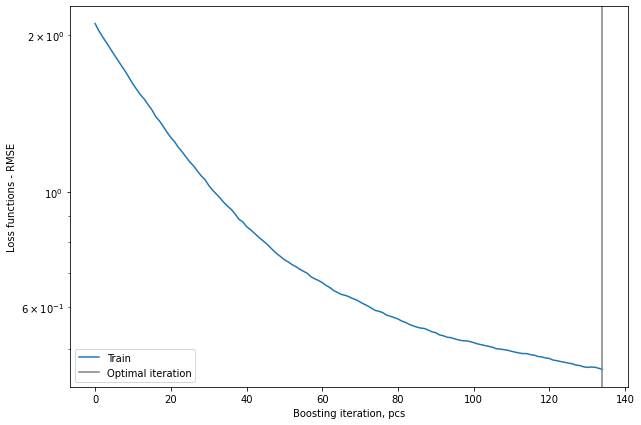

In [30]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [31]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [32]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -1.73
RMSE: 0.5
Relative RMSE(%):  0.185
MSE: 0.2
R square: 74.3%


In [33]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.992
a1: 0.581
R^2: 0.811
Uncertainty
a0: 0.99+/-0.07
a1: 0.581+/-0.028


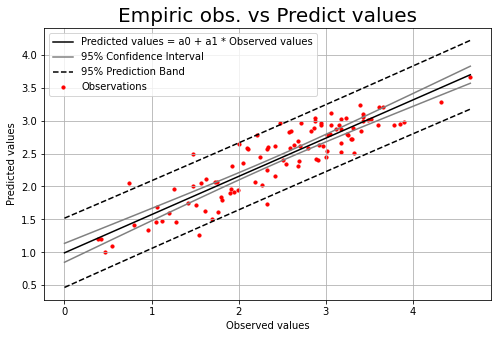

In [34]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

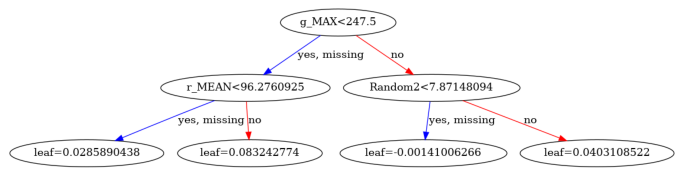

In [36]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

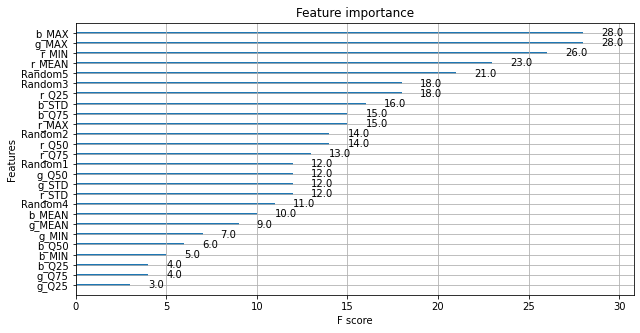

In [38]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

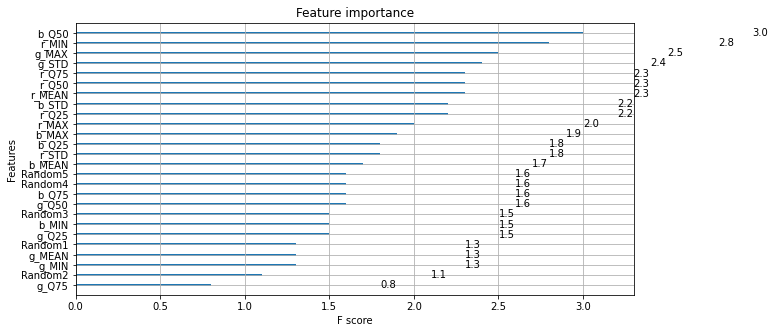

In [39]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

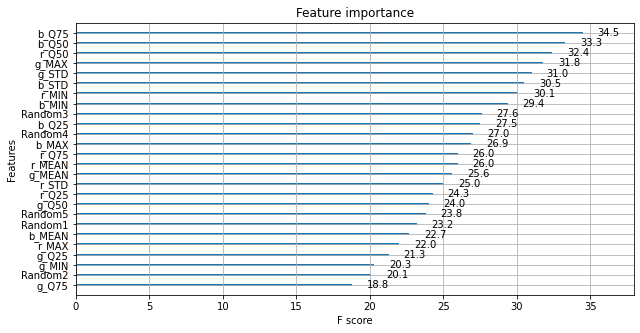

In [40]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [41]:
# Load SHAP`s library
import shap

In [42]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


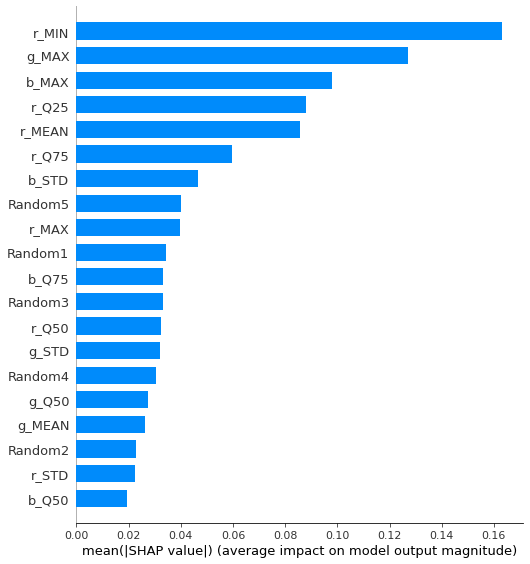

In [43]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

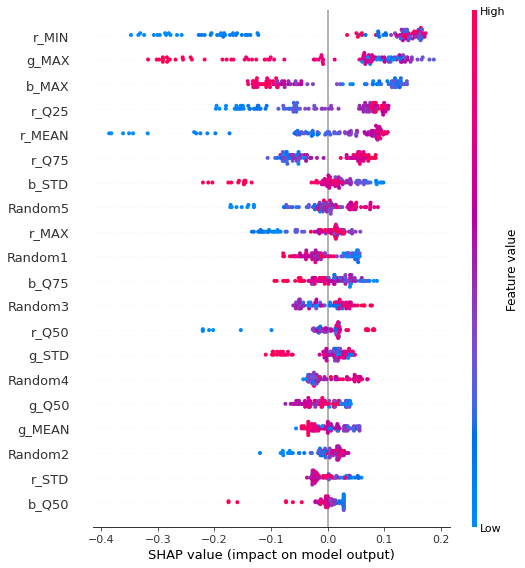

In [44]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

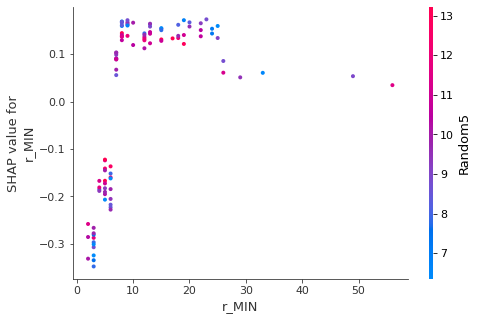

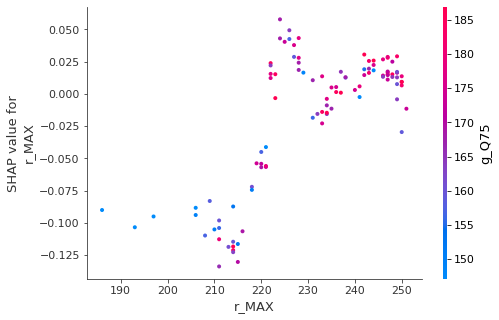

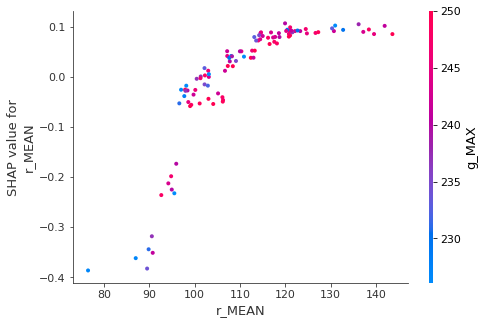

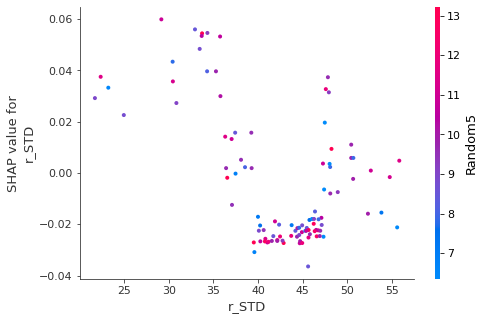

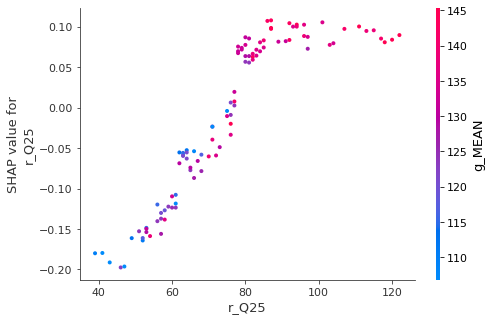

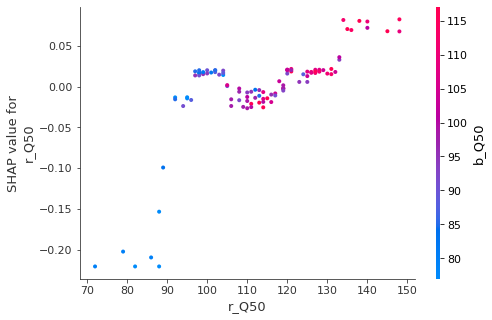

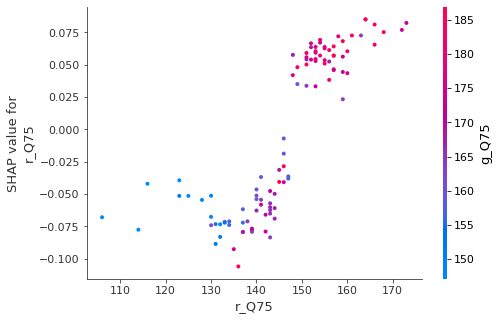

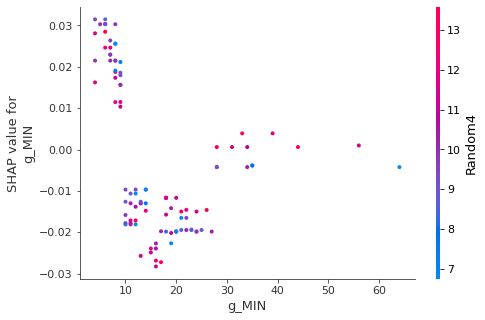

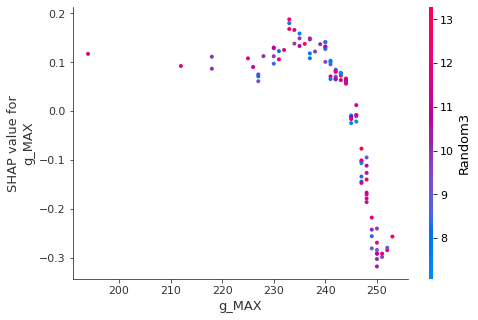

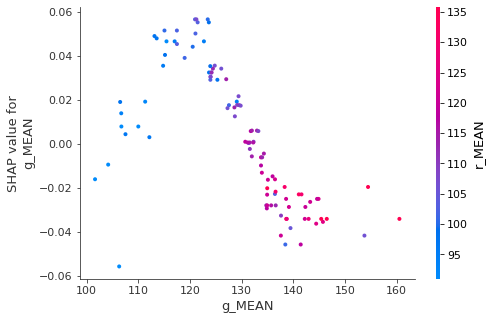

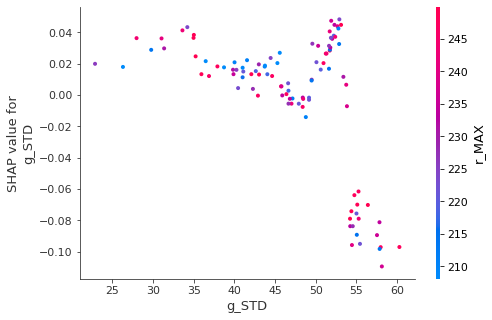

invalid value encountered in true_divide
invalid value encountered in true_divide


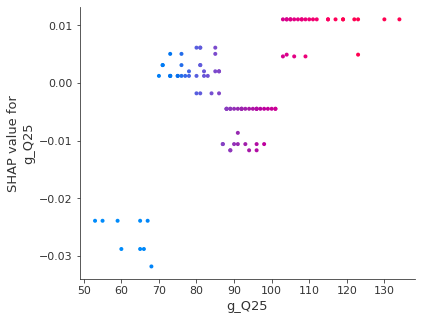

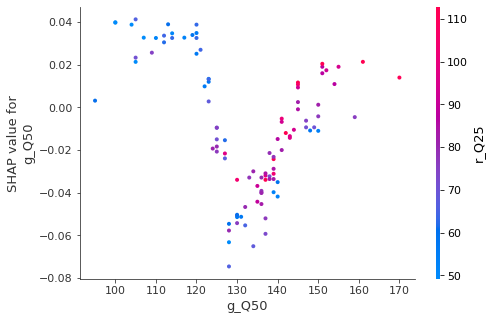

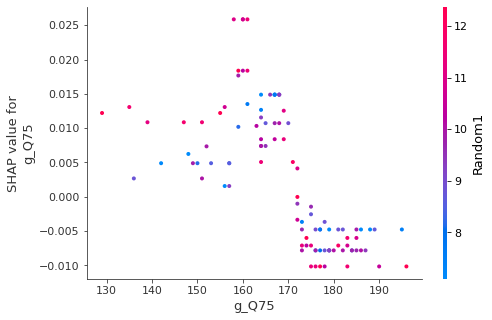

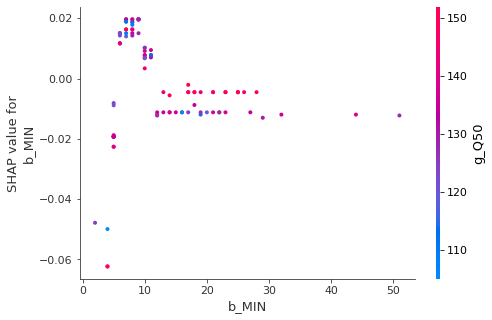

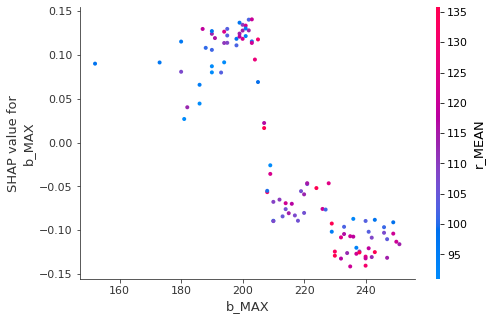

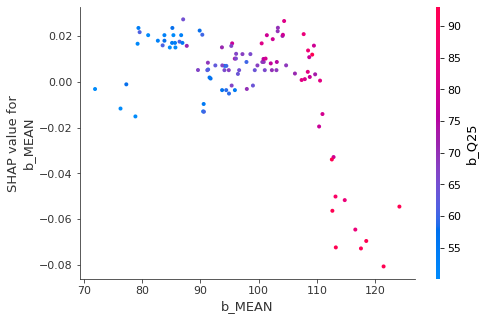

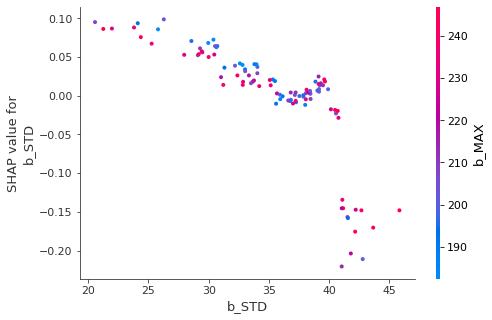

invalid value encountered in true_divide
invalid value encountered in true_divide


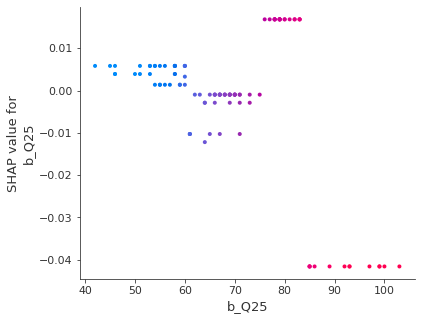

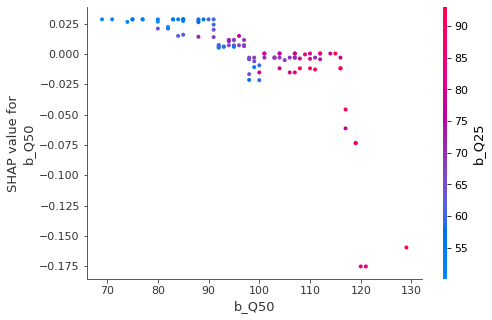

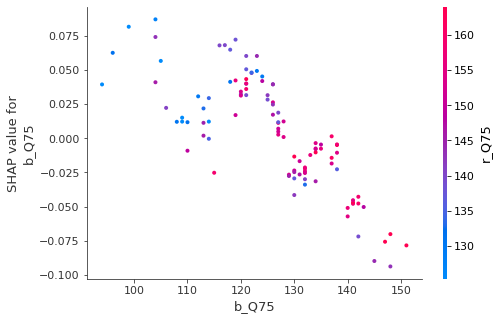

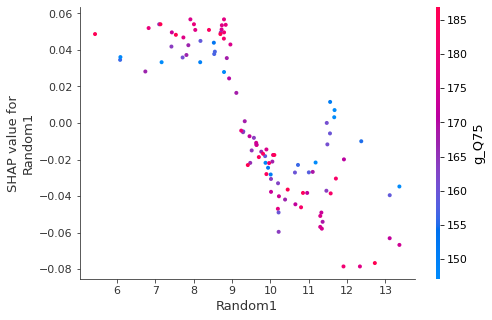

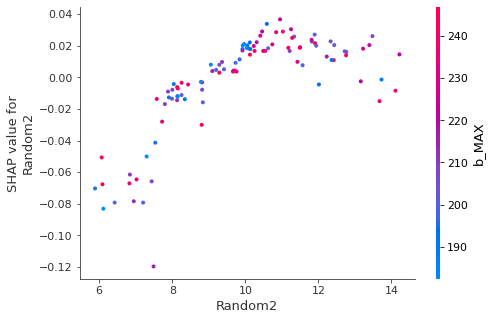

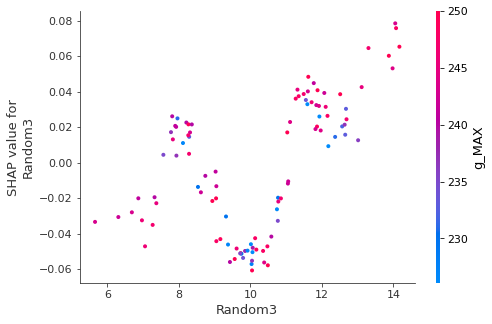

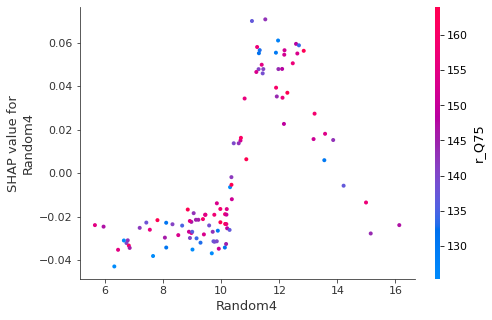

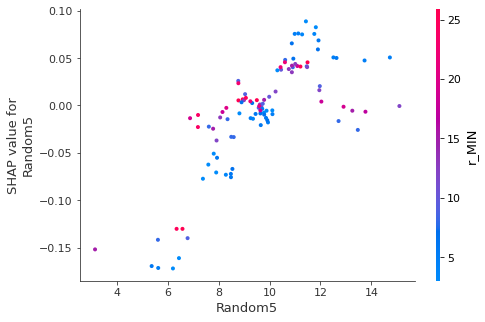

In [45]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_Sr_XGB_model_.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_St_XGB_model_.txt")